In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks as cf

# Data science imports
import pandas as pd
import numpy as np

%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import os
cwd = os.getcwd()

In [3]:
os. getcwd()

'/Users/jenarriaza/Downloads'

In [4]:
df = pd.read_csv("DSNY_Monthly_Tonnage_Data.csv")

In [5]:
df.shape

(21107, 11)

In [6]:
print(df.isnull().sum())

MONTH                      0
BOROUGH                    0
COMMUNITYDISTRICT          0
REFUSETONSCOLLECTED        0
PAPERTONSCOLLECTED      2622
MGPTONSCOLLECTED        2910
RESORGANICSTONS        19494
SCHOOLORGANICTONS      20077
LEAVESORGANICTONS      20370
XMASTREETONS           19627
BOROUGH_ID                 0
dtype: int64


In [7]:
df.drop(['PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS', 'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS'], axis=1, inplace=True)

In [8]:
print(df.isnull().sum())

MONTH                  0
BOROUGH                0
COMMUNITYDISTRICT      0
REFUSETONSCOLLECTED    0
BOROUGH_ID             0
dtype: int64


In [9]:
pd.set_option('display.max_columns', None)
df.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,BOROUGH_ID
0,1993 / 11,Manhattan,1,625.2,1
1,1992 / 03,Manhattan,1,726.0,1
2,1995 / 08,Manhattan,1,627.5,1
3,1991 / 08,Manhattan,1,695.1,1
4,1995 / 09,Manhattan,1,633.1,1


In [69]:
df['year'] = pd.np.where(df.MONTH.str.contains("1990"), "none",
                   pd.np.where(df.MONTH.str.contains("1991"), "1991",
                   pd.np.where(df.MONTH.str.contains("1992"), "1992",
                   pd.np.where(df.MONTH.str.contains("1993"), "1993",
                   pd.np.where(df.MONTH.str.contains("1994"), "1994",
                   pd.np.where(df.MONTH.str.contains("1995"), "1995",
                   pd.np.where(df.MONTH.str.contains("1996"), "1996",
                   pd.np.where(df.MONTH.str.contains("1997"), "1997",
                   pd.np.where(df.MONTH.str.contains("1998"), "1998",
                   pd.np.where(df.MONTH.str.contains("1999"), "1999",
                   pd.np.where(df.MONTH.str.contains("2000"), "2000",
                   pd.np.where(df.MONTH.str.contains("2001"), "2001",
                   pd.np.where(df.MONTH.str.contains("2002"), "2002",
                   pd.np.where(df.MONTH.str.contains("2003"), "2003",
                   pd.np.where(df.MONTH.str.contains("2004"), "2004",
                   pd.np.where(df.MONTH.str.contains("2005"), "2005",
                   pd.np.where(df.MONTH.str.contains("2006"), "2006",
                   pd.np.where(df.MONTH.str.contains("2007"), "2007",
                   pd.np.where(df.MONTH.str.contains("2008"), "2008",
                   pd.np.where(df.MONTH.str.contains("2009"), "2009",
                   pd.np.where(df.MONTH.str.contains("2010"), "2010",
                   pd.np.where(df.MONTH.str.contains("2011"), "2011",
                   pd.np.where(df.MONTH.str.contains("2012"), "2012",
                   pd.np.where(df.MONTH.str.contains("2013"), "2013",
                   pd.np.where(df.MONTH.str.contains("2014"), "2014",
                   pd.np.where(df.MONTH.str.contains("2015"), "2015",
                   pd.np.where(df.MONTH.str.contains("2016"), "2016",
                   pd.np.where(df.MONTH.str.contains("2017"), "2017",
                   pd.np.where(df.MONTH.str.contains("2018"), "2018",
                   pd.np.where(df.MONTH.str.contains("2019"), "2019",
                   pd.np.where(df.MONTH.str.contains("2020"), "2020", "")))))))))))))))))))))))))))))))
## create new variable for month, conditional to content of MONTH variable.
df['month2'] =    pd.np.where(df.MONTH.str.contains(" / 01"), "Jan",
                   pd.np.where(df.MONTH.str.contains(" / 02"), "Feb",
                   pd.np.where(df.MONTH.str.contains(" / 03"), "Mar",
                   pd.np.where(df.MONTH.str.contains(" / 04"), "Apr",
                   pd.np.where(df.MONTH.str.contains(" / 05"), "May",
                   pd.np.where(df.MONTH.str.contains(" / 06"), "Jun",
                   pd.np.where(df.MONTH.str.contains(" / 07"), "Jul",
                   pd.np.where(df.MONTH.str.contains(" / 08"), "Aug",
                   pd.np.where(df.MONTH.str.contains(" / 09"), "Sep",
                   pd.np.where(df.MONTH.str.contains(" / 10"), "Oct",
                   pd.np.where(df.MONTH.str.contains(" / 11"), "Nov",
                   pd.np.where(df.MONTH.str.contains(" / 12"), "Dec", " "))))))))))))

In [70]:
df

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,BOROUGH_ID,year,month2
0,1993 / 11,Manhattan,1,625.2,1,1993,Nov
1,1992 / 03,Manhattan,1,726.0,1,1992,Mar
2,1995 / 08,Manhattan,1,627.5,1,1995,Aug
3,1991 / 08,Manhattan,1,695.1,1,1991,Aug
4,1995 / 09,Manhattan,1,633.1,1,1995,Sep
...,...,...,...,...,...,...,...
21102,2017 / 07,Bronx,6,2143.5,2,2017,Jul
21103,2019 / 02,Bronx,6,1921.2,2,2019,Feb
21104,2018 / 10,Bronx,6,2281.1,2,2018,Oct
21105,2017 / 12,Bronx,6,2087.1,2,2017,Dec


In [71]:
df['year'].replace('none',np.nan, inplace=True)

In [72]:
df.shape

(20428, 7)

In [73]:
df.isnull().sum()

MONTH                  0
BOROUGH                0
COMMUNITYDISTRICT      0
REFUSETONSCOLLECTED    0
BOROUGH_ID             0
year                   0
month2                 0
dtype: int64

In [74]:
df.dropna(subset=['year'], inplace=True)

In [75]:
df.shape

(20428, 7)

In [76]:
import chart_studio.plotly as py
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [66]:
df.groupby('BOROUGH').sum()['REFUSETONSCOLLECTED'].iplot(
    kind='bar', yTitle='Number of Tonnes Collected', orientation='h', color='lightblue', linecolor='white', title='Tonnes Collected by Borough')

In [40]:
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [45]:
df2_pivoted = df[df['year']>'2016'].pivot_table(index='month2', columns='year', values='REFUSETONSCOLLECTED').reindex(months_in_order)
df2_pivoted

year,2017,2018,2019
month2,,,
Jan,3399.801695,3403.464407,3432.815254
Feb,2975.827119,3027.310169,2989.049153
Mar,3351.905085,3407.583051,3295.588136
Apr,3461.008475,3383.300000,3622.066102
May,3919.342373,3910.754237,3866.952542
Jun,3885.179661,3772.922034,3720.240678
Jul,3653.037288,3682.066102,3811.633898
Aug,3698.845763,3755.510169,3629.096610
Sep,3570.083051,3551.686441,3488.672881


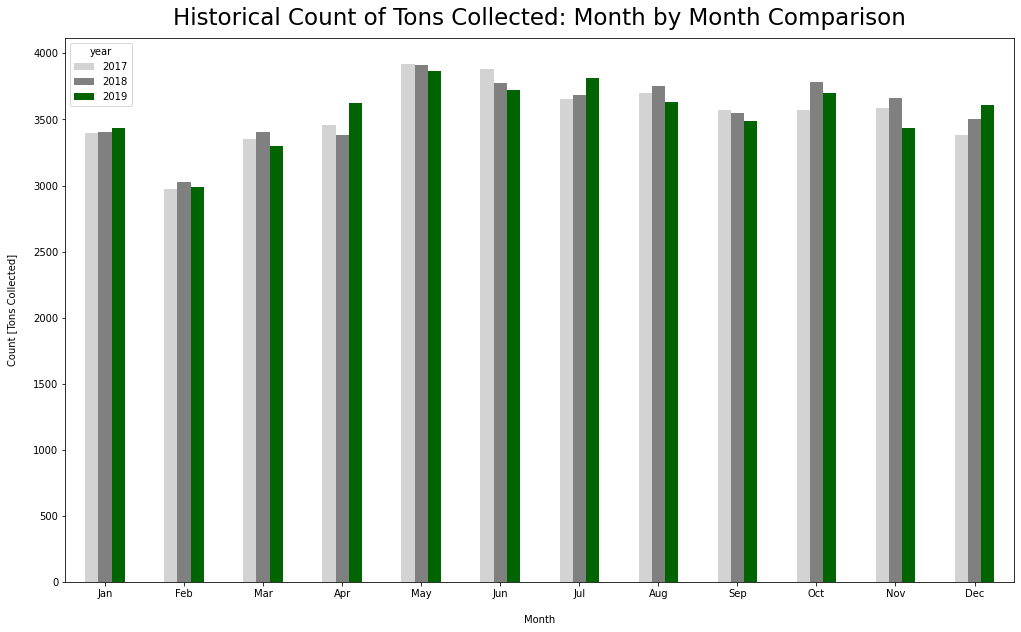

In [63]:
df2_pivoted.plot(kind='bar', figsize=(17, 10), color=['lightgray', 'gray', 'darkgreen'], rot=0)                                       
plt.title("Historical Count of Tons Collected: Month by Month Comparison", y=1.013, fontsize=23)
plt.xlabel("Month", labelpad=16)
plt.ylabel("Count [Tons Collected]", labelpad=16);

In [68]:
df.groupby('year').sum()['REFUSETONSCOLLECTED'].iplot(
    kind='bar', yTitle='Number of Tonnes Collected', color='green', linecolor='black', sortbars=True, title='Tonnes Collected by Year')

In [22]:
df['REFUSETONSCOLLECTED'].iplot(
    kind='hist',
    bins=100,
    xTitle='Tons of Trash',
    linecolor='blue',
    yTitle='Count',
    title='Tons Distribution')

In [ ]:
df2.REFUSETONSCOLLECTED.describe()

In [ ]:
df2

In [ ]:
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
df2.pivot_table(index='month2', columns='year',
               values='REFUSETONSCOLLECTED', aggfunc=np.mean)
## averages range from 2000 to 4000 tonnes of garbage collected each month across boroughs